## Método de Ondas Planas

Programa para calcular la estructura de bandas de un cristal
Fotónico 1D por medio del método de ondas planas PWE  
Referencia: Photonics Crystals, Physics and practical modeling  
Igor A. Sukhoivanov and Igor V. Guryev

In [54]:
import numpy as np
import matplotlib.pyplot as plt

l1 = 0.3e-6
l2 = 0.5e-6

eps1 = 9
eps2 = 9

a = l1+l2
numG = 100

G  = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
G1 = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
chi = np.zeros((len(G),len(G1)),dtype = 'complex_')

for i in range(len(G)):
    for J in range(len(G1)):
        if(G[i] - G1[J]) == 0:
            chi[i,J] = 1/(l1+l2) * (1/eps1 * l1 + 1/eps2*l2)
        else:
            chi[i,J] = 1j /(l1+l2)/(G[i]-G1[J]) * ((1/eps1 * (np.exp(-1j * (G[i]-G1[J]) * l1) - 1)) + (1/eps2 * (np.exp(-1j * (G[i]-G1[J]) * (l1+l2)) - np.exp(-1j * (G[i]-G1[J])*l1))))


In [55]:
print(chi)
print(chi.shape)

[[ 6.66666667e-01+0.00000000e+00j -1.00035146e-01-2.41506207e-01j
   7.07355303e-02-7.07355303e-02j ...  5.07792621e-04-2.10334590e-04j
  -7.14500306e-04-7.14500306e-04j  5.02689177e-04-1.21359903e-03j]
 [-1.00035146e-01+2.41506207e-01j  6.66666667e-01+0.00000000e+00j
  -1.00035146e-01-2.41506207e-01j ... -8.51422240e-15-1.44358225e-03j
   5.07792621e-04-2.10334590e-04j -7.14500306e-04-7.14500306e-04j]
 [ 7.07355303e-02+7.07355303e-02j -1.00035146e-01+2.41506207e-01j
   6.66666667e-01+0.00000000e+00j ... -5.13000750e-04-2.12491868e-04j
  -8.51422240e-15-1.44358225e-03j  5.07792621e-04-2.10334590e-04j]
 ...
 [ 5.07792621e-04+2.10334590e-04j -8.51422240e-15+1.44358225e-03j
  -5.13000750e-04+2.12491868e-04j ...  6.66666667e-01+0.00000000e+00j
  -1.00035146e-01-2.41506207e-01j  7.07355303e-02-7.07355303e-02j]
 [-7.14500306e-04+7.14500306e-04j  5.07792621e-04+2.10334590e-04j
  -8.51422240e-15+1.44358225e-03j ... -1.00035146e-01+2.41506207e-01j
   6.66666667e-01+0.00000000e+00j -1.00035146e-

In [56]:
M = np.zeros((len(G),len(G1)),dtype = 'complex_')
ks = np.linspace(-2*np.pi/a, 2*np.pi/a,100)
Ks = list()
dispe = list()


In [57]:
for k in range(len(ks)):
    for i in range(len(G)):
        for j in range(len(G1)):
            M[j,i] = chi[j,i] * (ks[k] + G1[j]) * (ks[k] + G[i])
    V = np.linalg.eig(M)[0]
    dispe.append(np.sqrt(np.sort(np.abs(V))) * a/2/np.pi)
    Ks.append(ks[k] * a/np.pi)




In [58]:
print(dispe[0])

[2.00316217e-07 5.07180817e-01 6.52435529e-01 1.05043866e+00
 1.23543043e+00 1.66912386e+00 1.75707499e+00 2.26046248e+00
 2.33206844e+00 2.77832645e+00 2.95877845e+00 3.35262623e+00
 3.50897195e+00 4.00005739e+00 4.01794302e+00 4.52388386e+00
 4.65661448e+00 5.06074146e+00 5.24870597e+00 5.67102650e+00
 5.77460665e+00 6.27882063e+00 6.33294927e+00 6.79304403e+00
 6.96744349e+00 7.35917046e+00 7.52502586e+00 8.00048220e+00
 8.03706521e+00 8.54144626e+00 8.66038844e+00 9.07313088e+00
 9.26165276e+00 9.67404816e+00 9.79362751e+00 1.02980578e+01
 1.03338975e+01 1.08103208e+01 1.09756264e+01 1.13675166e+01
 1.15426487e+01 1.20017419e+01 1.20571506e+01 1.25621493e+01
 1.26640188e+01 1.30876219e+01 1.32758308e+01 1.36791713e+01
 1.38136611e+01 1.43211498e+01 1.43354741e+01 1.48298189e+01
 1.49845005e+01 1.53796476e+01 1.55611674e+01 1.60046850e+01
 1.60818726e+01 1.65853425e+01 1.66682533e+01 1.71075531e+01
 1.72905970e+01 1.76874230e+01 1.78389486e+01 1.83382200e+01
 1.83472988e+01 1.885647

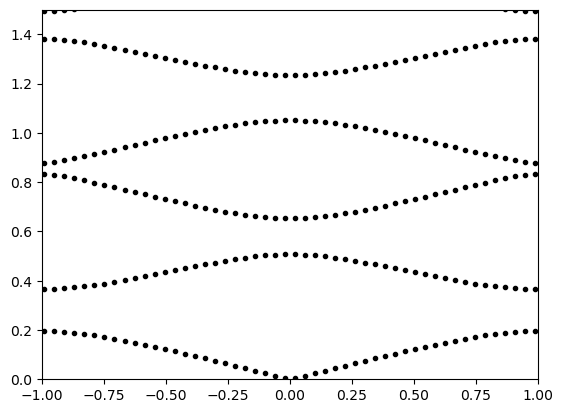

In [59]:
import matplotlib.pyplot as plt

for i in range(len(Ks)):
    plt.plot([Ks[i]] * len(dispe[i]), dispe[i],'.',color='black')
    plt.xlim([-1,1])
    plt.ylim([0,1.5])

## Campo Eléctrico

In [50]:
def Field(x):
    global a, numG, k, Vs, in1
    H = 0
    countt = 0
    for G in np.arange(-numG * 2 * np.pi / a, numG * 2 * np.pi / a + 0.0001, 2 * np.pi / a):
        countt += 1
        H += Vs[countt - 1, in1] * np.exp(1j * (k + G) * x)
    return H

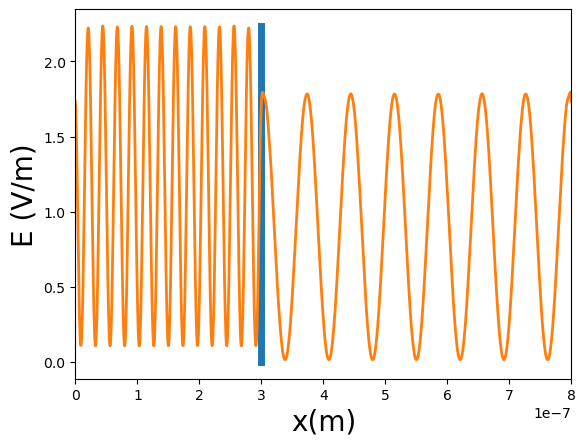

In [61]:
from scipy.linalg import eigh

def calculate_field(x, a, numG, k, Vs, in1):
    H = 0
    countt = 0
    for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        countt += 1
        H += Vs[countt,in1]*np.exp(1j*(k+G)*x)
    return H

k = np.pi/(15*a)
in1 = 20

countG1 = 1
countG = 1
M1 = np.zeros((2*numG+1, 2*numG+1), dtype=complex)

for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
    for G1 in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        M1[countG1-1,countG-1] = chi[countG1-1,countG-1]*(k+G1)*(k+G)
        countG += 1
    countG1 += 1
    countG = 1

countG1 = 1

eigvals, eigvecs = eigh(M1)
ind = np.argsort(eigvals)
Ds = eigvals[ind]
Vs = eigvecs[:,ind]

freq = np.sqrt(abs(Ds[in1-1]))*a/2/np.pi

div = 15
div1 = 1500
x = np.linspace(0, a, div1+1)
FieldE = np.abs(calculate_field(x, a, numG, k, Vs, in1))**2

alt = np.max(np.abs(FieldE))
x1 = np.linspace(0, alt, div+1)
y1 = l1*np.ones(div+1)

plt.figure(2)
plt.plot(y1, x1, linewidth=5)
plt.plot(x, FieldE, linewidth=2)
plt.xlabel('x(m)', fontsize=20)
plt.ylabel('E (V/m)', fontsize=20)
#plt.ylim([0, alt])
plt.xlim([0, a])
plt.show()
